#Hypothesis Testing
Hypothesis testing is a statistical technique used to assess whether there is enough evidence in a sample of data to support or reject a given hypothesis about a population. It's a way of testing an assumption or claim about a population based on sample data.

##Basic Steps of Hypothesis Testing:
1. Formulate Hypotheses:

 Null Hypothesis (H₀): This represents the assumption that there is no effect or no difference. It is the hypothesis that we try to test against.

 Alternative Hypothesis (H₁ or Ha): This is the hypothesis that represents a new effect or difference. It contradicts the null hypothesis.

2. Set Significance Level (α):

 Typically, a significance level of 0.05 is chosen. This means there is a 5% chance of incorrectly rejecting the null hypothesis (Type I error).

3. Select the Appropriate Test:

 Based on the data and hypothesis, you choose an appropriate statistical test (e.g., t-test, z-test, chi-square test, etc.).

4. Calculate the Test Statistic:

 This is the value calculated from your sample data that will help determine whether to reject or fail to reject the null hypothesis.

5. Decision Rule:

 P-value: A p-value is calculated from the test statistic. If the p-value is smaller than the significance level (α), you reject the null hypothesis. If it’s larger, you fail to reject the null hypothesis.
6. Conclusion:

 Based on the p-value and the significance level, you conclude whether or not there is enough evidence to reject the null hypothesis.

##Purpose of Hypothesis Testing:
- To make decisions or inferences based on data.
- To determine the statistical significance of an observed effect, relationship, or difference.
- To validate claims about a population based on sample data.

In essence, hypothesis testing helps to determine whether there is enough evidence to support or reject a theory or claim.

In [ ]:
import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="darkgrid") # set the background for the graphs
from scipy.stats import skew
from statsmodels.stats.proportion import proportions_ztest # For proportion Z-test
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA
from   scipy.stats import chi2_contingency   # For Chi-Sq

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riyabangera","key":"880ce8863a711ab341c8d3126ed921ad"}'}

In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mirichoi0218/insurance

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 26.9MB/s]


In [ ]:
!ls

insurance.zip  sample_data


In [ ]:
!unzip insurance.zip

Archive:  insurance.zip
  inflating: insurance.csv           


In [ ]:
import pandas as pd
df=pd.read_csv("insurance.csv")
insured=df.copy()

## Using Hypothesis testing to prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't.

Step 1: Define null and alternative hypothesis

H
0
:
μ
1
**<=**
μ
2
  The average charges of smokers is less than or equal to nonsmokers

H
a
:
μ
1
**>**
μ
2
  The average charges of smokers is greater than nonsmokers

Step 2: Decide the significance level.

If P values is less than alpha reject the null hypothesis.
α = 0.05


Step 3: Identify the test

Standard deviation of the population is not known ,will perform a T stat test . The > sign in alternate hypothesis indicate test is right tailed, that is all z values that would cause us to reject null hypothesis are in just one tail to the right of sampling distribution curve.

Step 4: Calculate the test-statistics and p-value

In [ ]:
smoker=insured.loc[insured.smoker=="yes"]
smoker.head()

age     sex    bmi  children smoker     region     charges
0    19  female  27.90         0    yes  southwest  16884.9240
11   62  female  26.29         0    yes  southeast  27808.7251
14   27    male  42.13         0    yes  southeast  39611.7577
19   30    male  35.30         0    yes  southwest  36837.4670
23   34  female  31.92         1    yes  northeast  37701.8768

In [ ]:
smoker.count()

age         274
sex         274
bmi         274
children    274
smoker      274
region      274
charges     274
dtype: int64

In [ ]:
nonsmoker=insured.loc[insured.smoker=='no']
nonsmoker.head()

age     sex     bmi  children smoker     region      charges
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160

In [ ]:
nonsmoker.count()

age         1064
sex         1064
bmi         1064
children    1064
smoker      1064
region      1064
charges     1064
dtype: int64

In [ ]:
# Adjusting the size of the rows to be equal
nonsmoker = nonsmoker[-274:]
charges_yes = smoker.charges
charges_no = nonsmoker.charges

In [ ]:
print('Average Cost charged to Insurance for smoker is {} and nonsmoker is {} '.format(charges_yes.mean(),charges_no.mean()))

Average Cost charged to Insurance for smoker is 32050.23183153284 and nonsmoker is 8441.249055766422 


[Text(0.5, 1.0, 'Fig:1 Smoker vs Charges')]

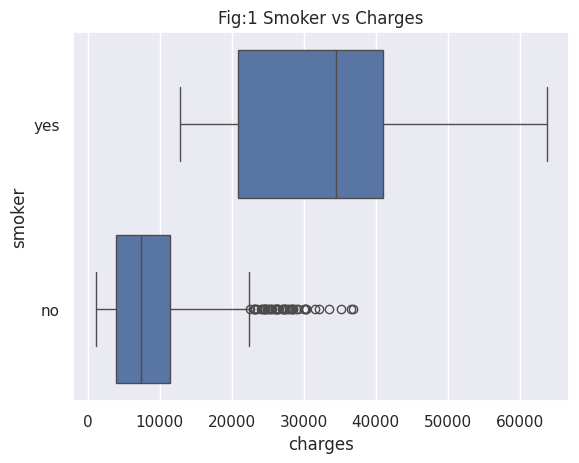

In [ ]:
#smoker vs charges
sns.boxplot(x=insured.charges,y=insured.smoker,data=insured).set(title="Fig:1 Smoker vs Charges")

In [ ]:

alpha=0.05
t_statistic_1, p_value_1 = stats.ttest_ind(charges_yes, charges_no)
p_value_onetail=p_value_1/2

print("Test statistic = {} , Pvalue ={} , OnetailPvalue = {}".format(t_statistic_1,p_value_1, p_value_onetail ))

Test statistic = 30.168384427571915 , Pvalue =2.160499003168038e-118 , OnetailPvalue = 1.080249501584019e-118


In [ ]:
if p_value_1 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_onetail,alpha) )
    print("Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.")

else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_onetail,alpha))
    print("Failed to Reject Null Hypothesis that Average charges for smokers are less than nonsmoker.")

Conclusion:Since P value 1.080249501584019e-118 is less than alpha 0.05 
Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.


Step 5: Decide whethere to reject or failed to reject null hypothesis

We reject the null hypothesis and can conclude that people who smoke have on an average larger medical claim compared to people who don't smoke. Similar result can also been seen in Fig no.1 Smokers Vs Charges